In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = sns.load_dataset('titanic')

In [6]:
from sklearn.preprocessing import LabelEncoder

df = df[['survived', 'pclass','sex','age','fare','embarked']].dropna()
df['sex'] = LabelEncoder().fit_transform(df['sex'])
df['embarked'] = LabelEncoder().fit_transform(df['embarked'])

In [9]:
x = df.drop("survived",axis = 1)
y = df['survived']

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as mt

In [13]:
x_train , x_test,y_train, y_test = train_test_split(x,y,train_size = 0.8, random_state = 42)


In [14]:
model_v1 = LogisticRegression(max_iter=1000)
model_v1.fit(x_train,y_train)

model_v2 = RandomForestClassifier(n_estimators=100, random_state=42)
model_v2.fit(x_train,y_train)


RandomForestClassifier(random_state=42)

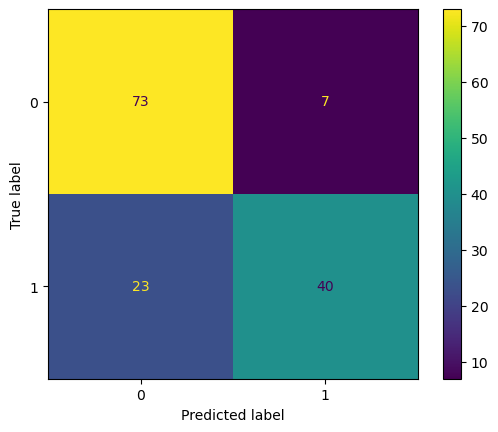

In [15]:
y_pred_v1 = model_v1.predict(x_test)
cm_lr = mt.confusion_matrix(y_test,y_pred_v1)
disp_log = mt.ConfusionMatrixDisplay(confusion_matrix = cm_lr)
disp_log.plot()


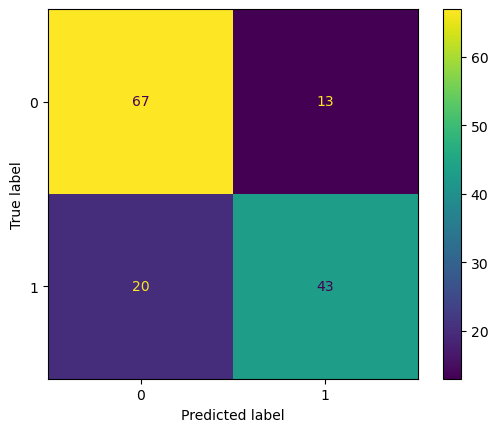

In [18]:
y_pred_v2 = model_v2.predict(x_test)
cm_2r = mt.confusion_matrix(y_test,y_pred_v2)
disp_log2 = mt.ConfusionMatrixDisplay(confusion_matrix = cm_2r)
disp_log2.plot()

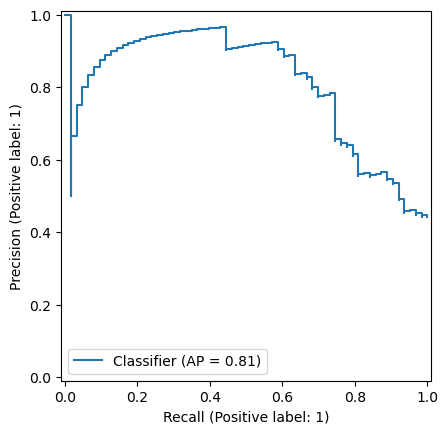

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

# Logistic Regression
y_proba_log = model_v1.predict_proba(x_test)[:, 1]
PrecisionRecallDisplay.from_predictions(y_test, y_proba_log)

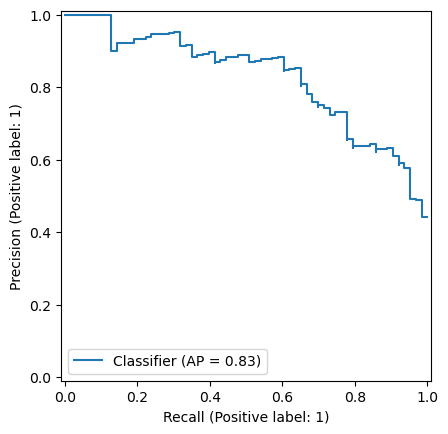

In [21]:
# Random Forest
y_proba_rf = model_v2.predict_proba(x_test)[:, 1]
PrecisionRecallDisplay.from_predictions(y_test, y_proba_rf)